In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import time
import os

In [3]:
ls

176-01-bikelocations.csv     PORTOBELLO ROAD.csv
176-01-ind_dublinalt.csv     fulldata-spoken.ipynb
176-01-ind_dublinalt.csv.gz  knn for neil.ipynb
176-01-sum_dublinalt.csv     pboh.ipynb


In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("PORTOBELLO ROAD.csv", parse_dates=True, index_col='timestamp')

In [16]:
df.head()

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2011-03-02 06:20:02,43,0,0,0
2011-03-02 06:30:01,43,3,27,0
2011-03-02 06:40:02,43,3,27,0
2011-03-02 06:50:01,43,3,27,0
2011-03-02 07:00:03,43,3,27,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 4 columns):
tfl_id         1136831 non-null int64
bikes          1136831 non-null int64
spaces         1136831 non-null int64
total_docks    1136831 non-null int64
dtypes: int64(4)
memory usage: 43.4 MB


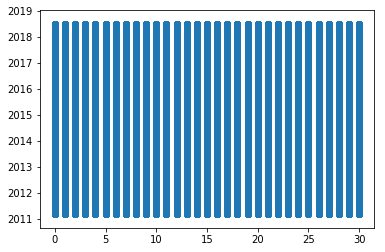

In [22]:
plt.scatter( df.bikes,df.index)

In [28]:
last_two = df.loc['2017':'2018']

In [30]:
last_two.tail()

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2018-06-28 16:38:02,43,7,23,30
2018-06-28 16:40:02,43,6,24,30
2018-06-28 16:42:03,43,8,22,30
2018-06-28 16:44:02,43,8,22,30
2018-06-28 16:46:02,43,8,22,30


In [32]:
last_two.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385409 entries, 2017-01-01 00:00:01 to 2018-06-28 16:46:02
Data columns (total 4 columns):
tfl_id         385409 non-null int64
bikes          385409 non-null int64
spaces         385409 non-null int64
total_docks    385409 non-null int64
dtypes: int64(4)
memory usage: 14.7 MB


In [37]:
last_two.drop(['total_docks'], axis = 1, inplace = True)

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
last_two.drop(['tfl_id'], axis = 1, inplace = True)

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
last_two.tail()

,bikes,spaces
timestamp,,
2018-06-28 16:38:02,7,23
2018-06-28 16:40:02,6,24
2018-06-28 16:42:03,8,22
2018-06-28 16:44:02,8,22
2018-06-28 16:46:02,8,22


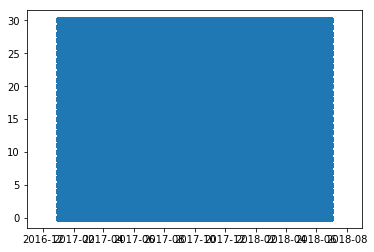

In [46]:
plt.scatter(last_two.index ,last_two['bikes'])

In [53]:
last_two.describe()

,bikes,spaces
count,385409.000000,385409.000000
mean,15.268154,14.702140
std,10.733260,10.736737
min,0.000000,0.000000
25%,5.000000,4.000000
50%,16.000000,14.000000
75%,26.000000,25.000000
max,30.000000,30.000000


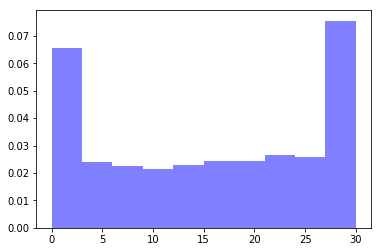

In [54]:
num_bins = 10
plt.hist(last_two['bikes'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

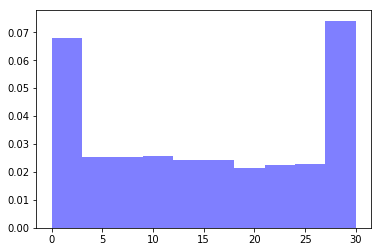

In [56]:
num_bins = 10
plt.hist(last_two['spaces'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

Text(0,0.5,'Total Sales')

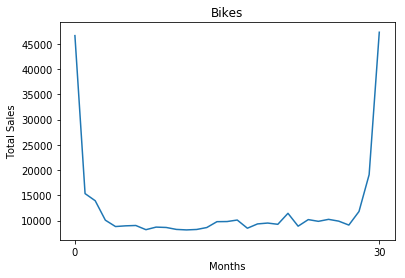

In [60]:
sales_by_month = last_two.groupby('bikes').size()
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Bikes',xticks=(0,30))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Sales')

In [64]:
last_two['bikes'].describe()

count    385409.000000
mean         15.268154
std          10.733260
min           0.000000
25%           5.000000
50%          16.000000
75%          26.000000
max          30.000000
Name: bikes, dtype: float64

In [65]:
last_two.describe()

,bikes,spaces
count,385409.000000,385409.000000
mean,15.268154,14.702140
std,10.733260,10.736737
min,0.000000,0.000000
25%,5.000000,4.000000
50%,16.000000,14.000000
75%,26.000000,25.000000
max,30.000000,30.000000


In [71]:
df['month'] = df.index.map(lambda x: x.strftime('%-m'))

In [79]:
df['day'] = df.index.map(lambda x: x.strftime('%d'))

In [86]:
df['weekday'] = df.index.map(lambda x: x.strftime('%w'))

In [94]:
df['hour'] = df.index.map(lambda x: x.strftime('%-H'))

In [95]:
df['Minute'] = df.index.map(lambda x: x.strftime('%-M'))

In [89]:
df['AMPM'] = df.index.map(lambda x: x.strftime('%p'))

In [90]:
df['dayofyear'] = df.index.map(lambda x: x.strftime('%j'))

In [91]:
df['weeknumber'] = df.index.map(lambda x: x.strftime('%W'))

In [96]:
df.tail()

,bikes,spaces,month,day,weekday,hour,AMPM,dayofyear,weeknumber,Minute
timestamp,,,,,,,,,,
2018-06-28 16:38:02,7,23,28,28,4,16,PM,179,26,38
2018-06-28 16:40:02,6,24,28,28,4,16,PM,179,26,40
2018-06-28 16:42:03,8,22,28,28,4,16,PM,179,26,42
2018-06-28 16:44:02,8,22,28,28,4,16,PM,179,26,44
2018-06-28 16:46:02,8,22,28,28,4,16,PM,179,26,46


In [97]:
df.to_csv('f_features.csv')

In [98]:
ls


176-01-bikelocations.csv     f_features.csv
176-01-ind_dublinalt.csv     fulldata-spoken.ipynb
176-01-ind_dublinalt.csv.gz  knn for neil.ipynb
176-01-sum_dublinalt.csv     pboh.ipynb
PORTOBELLO ROAD.csv


In [99]:
featpd.read_csv('f_features.csv')

AttributeError: 'DataFrame' object has no attribute 'read_csv'